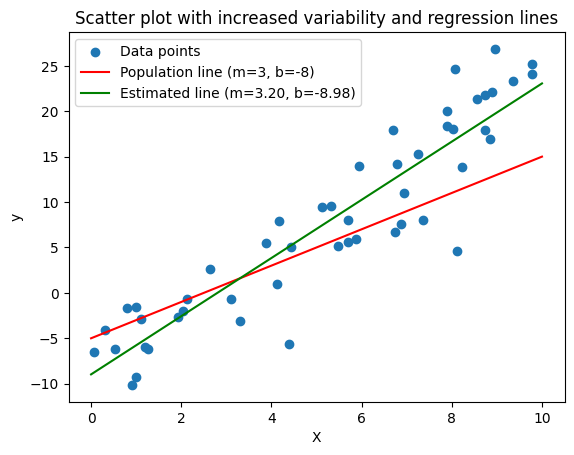

In [109]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Generate the data
x = 10 * np.random.rand(50)
y = 3 * x - 8 + np.random.randn(50) * 4

# Fit a linear regression model
x = x.reshape(-1, 1)
model = LinearRegression()
model.fit(x, y)

# Calculate the predicted values
y_pred = model.predict(x)

# Plot the scatter plot and regression lines
plt.scatter(x, y, label="Data points")
plt.xlabel("X")
plt.ylabel("y")
plt.title("Scatter plot with increased variability and regression lines")

# Plot the actual population line
x_line = np.linspace(0, 10, 100)
y_actual = 2 * x_line - 5
plt.plot(x_line, y_actual, 'r', label="Population line (m=3, b=-8)")

# Plot the estimated regression line
y_estimated = model.coef_[0] * x_line + model.intercept_
plt.plot(x_line, y_estimated, 'g', label=f"Estimated line (m={model.coef_[0]:.2f}, b={model.intercept_:.2f})")

# Add legend and show the plot
plt.legend()
plt.show()


## Regression analysis using statsmodel

In [110]:
import statsmodels.api as sm
import pandas as pd

url = "https://raw.githubusercontent.com/justmarkham/scikit-learn-videos/master/data/Advertising.csv"
data = pd.read_csv(url, index_col=0)

X = data[['TV', 'Radio', 'Newspaper']]
X = sm.add_constant(X)

print(X)

     const     TV  Radio  Newspaper
1      1.0  230.1   37.8       69.2
2      1.0   44.5   39.3       45.1
3      1.0   17.2   45.9       69.3
4      1.0  151.5   41.3       58.5
5      1.0  180.8   10.8       58.4
..     ...    ...    ...        ...
196    1.0   38.2    3.7       13.8
197    1.0   94.2    4.9        8.1
198    1.0  177.0    9.3        6.4
199    1.0  283.6   42.0       66.2
200    1.0  232.1    8.6        8.7

[200 rows x 4 columns]


In [111]:
y = data['Sales']
print(y)

1      22.1
2      10.4
3       9.3
4      18.5
5      12.9
       ... 
196     7.6
197     9.7
198    12.8
199    25.5
200    13.4
Name: Sales, Length: 200, dtype: float64


In [112]:
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Tue, 28 Jan 2025   Prob (F-statistic):           1.58e-96
Time:                        16:04:57   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.0